In [ ]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [ ]:
# Dias de permanência por hospital

df_Hosp = pd.read_excel(r'C:\Users\DuduCuco\Documents\NewDoencasRespiratorias\DoencasRespiratorias\Data\DiasPermEstabSaude.xlsx')
df_Hosp = df_Hosp.iloc[:, :-1]
#df_Hosp.columns

df_Hosp.head()

,Mês/ano de competência,2077531 A C CAMARGO CANCER CENTER,2077655 ASSOC AACD V CLEMENTINO,2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER,2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES,3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO,2080575 HOSP BENEF PORTUGUESA,2078015 HOSP CLINICAS - HC DA FMUSP,2075962 HOSP DA STA CASA DE STO AMARO,2077469 HOSP DOM ALVARENGA,...,2082624 HOSPITAL JAPONES SANTA CRUZ,2077507 HOSPITAL LEFORTE - LIBERDADE,2076896 HOSPITAL SAO LUIZ GONZAGA,6891411 IBCC UNIDADE JACANA,2077590 INST BRAS. CONTROLE CANCER-IBCC,2091550 INST CEMA DE OFTALMO E OTORRINO,6123740 INST DO CANCER DO ESTADO DE SAO PAULO,2071568 INST DO CORACAO - INCOR - HC/FMUSP,2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,2688689 SANTA CASA DE SAO PAULO
0,jan/08,10,0,0,0,0,114,0,347,0,...,0,44,3,0,0,4,0,363,20,508
1,fev/08,52,0,8,0,0,475,1546,269,83,...,0,76,557,0,1,7,0,756,7,1711
2,mar/08,31,0,20,0,0,627,2704,455,121,...,0,134,470,0,15,3,0,560,81,2053
3,abr/08,20,0,0,0,0,656,4181,502,192,...,0,44,642,0,20,7,0,577,46,1635
4,mai/08,112,0,20,0,0,236,2756,449,432,...,0,130,913,0,7,6,0,947,37,2316


In [ ]:
# Quebrando a coluna de data

df_Hosp['Mês/ano de competência'] = pd.to_datetime(df_Hosp['Mês/ano de competência'], format='%b/%y')

# Dividindo por ano/mes/dia
df_Hosp['Ano'] = df_Hosp['Mês/ano de competência'].dt.year
df_Hosp['Mês'] = df_Hosp['Mês/ano de competência'].dt.month

df_Hosp.drop('Mês/ano de competência',axis=1, inplace=True)

df_Hosp.head(5)

,2077531 A C CAMARGO CANCER CENTER,2077655 ASSOC AACD V CLEMENTINO,2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER,2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES,3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO,2080575 HOSP BENEF PORTUGUESA,2078015 HOSP CLINICAS - HC DA FMUSP,2075962 HOSP DA STA CASA DE STO AMARO,2077469 HOSP DOM ALVARENGA,2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS,...,2076896 HOSPITAL SAO LUIZ GONZAGA,6891411 IBCC UNIDADE JACANA,2077590 INST BRAS. CONTROLE CANCER-IBCC,2091550 INST CEMA DE OFTALMO E OTORRINO,6123740 INST DO CANCER DO ESTADO DE SAO PAULO,2071568 INST DO CORACAO - INCOR - HC/FMUSP,2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,2688689 SANTA CASA DE SAO PAULO,Ano,Mês
0,10,0,0,0,0,114,0,347,0,146,...,3,0,0,4,0,363,20,508,2008,1
1,52,0,8,0,0,475,1546,269,83,40,...,557,0,1,7,0,756,7,1711,2008,2
2,31,0,20,0,0,627,2704,455,121,162,...,470,0,15,3,0,560,81,2053,2008,3
3,20,0,0,0,0,656,4181,502,192,0,...,642,0,20,7,0,577,46,1635,2008,4
4,112,0,20,0,0,236,2756,449,432,211,...,913,0,7,6,0,947,37,2316,2008,5


In [ ]:
# Agrupando todas as colunas em uma

df_serie_hist  = df_Hosp.melt(id_vars=['Ano', 'Mês'], var_name='Hospital', value_name='Internações')

# Buscando o máximo de internações que cada hospital teve na série histórica

max_internacoes_por_hospital = df_serie_hist.groupby('Hospital')['Internações'].max()

# Adicionando uma coluna para o máximo de internações na série histórica

df_serie_hist['Lotação Máxima'] = df_serie_hist['Hospital'].map(max_internacoes_por_hospital)

# Adicionando uma coluna com a porcentagem de ocupação

df_serie_hist['Ocupação'] = (df_serie_hist['Internações'] / df_serie_hist['Lotação Máxima'])*100

# Filtro

#df_serie_hist.loc[df_serie_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_serie_hist.to_csv("serie_hist.csv", index=False)
df_serie_hist.head(12)


,Ano,Mês,Hospital,Internações,Lotação Máxima,Ocupação
0,2008,1,2077531 A C CAMARGO CANCER CENTER,10,413,2.421308
1,2008,2,2077531 A C CAMARGO CANCER CENTER,52,413,12.590799
2,2008,3,2077531 A C CAMARGO CANCER CENTER,31,413,7.506053
3,2008,4,2077531 A C CAMARGO CANCER CENTER,20,413,4.842615
4,2008,5,2077531 A C CAMARGO CANCER CENTER,112,413,27.118644
5,2008,6,2077531 A C CAMARGO CANCER CENTER,30,413,7.263923
6,2008,7,2077531 A C CAMARGO CANCER CENTER,89,413,21.549637
7,2008,8,2077531 A C CAMARGO CANCER CENTER,54,413,13.075061
8,2008,9,2077531 A C CAMARGO CANCER CENTER,150,413,36.319613
9,2008,10,2077531 A C CAMARGO CANCER CENTER,172,413,41.646489


In [ ]:
# Salvando as colunas Hospital e Lotação Máxima do dataframe df_serie_hist

ocupacao = df_serie_hist[['Hospital', 'Lotação Máxima']]

# Descobrindo a média de internações para cada mês e hospital, com base na série histórica

df_media_hist = df_serie_hist.groupby(['Hospital', 'Mês'])['Internações'].mean().astype(int).reset_index()

# Adicionando as colunas salvas anteriormente

df_media_hist = df_media_hist.merge(ocupacao, on=['Hospital'])

# Calculando a taxa de ocupação

df_media_hist['taxa_ocupacao'] = (df_media_hist['Internações'] / df_media_hist['Lotação Máxima'])*100

# Dropando as linhas duplicadas

df_media_hist.drop_duplicates(inplace=True)

# Filtro

#df_media_hist.loc[df_media_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_media_hist.head()

,Hospital,Mês,Internações,Lotação Máxima,taxa_ocupacao
0,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,1,83,1800,4.611111
187,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,2,111,1800,6.166667
374,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,3,112,1800,6.222222
561,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,4,66,1800,3.666667
748,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,5,88,1800,4.888889


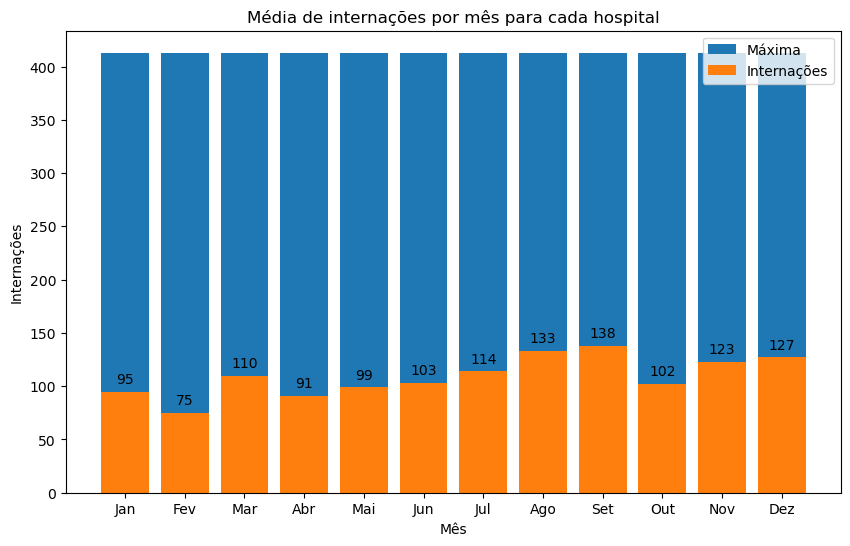

In [ ]:
# Criar uma figura e eixos
plt.figure(figsize=(10, 6))

# Iterar sobre cada hospital
hospital = input('Nome do hospital')
# Filtrar os dados apenas para o hospital atual
data_hospital = df_media_hist[df_media_hist['Hospital'] == hospital]

# Plotar os dados de internações para cada mês para o hospital atual

plt.bar(data_hospital['Mês'], data_hospital['Lotação Máxima'], label='Máxima')
plt.bar(data_hospital['Mês'], data_hospital['Internações'], label='Internações')

# Adicionar os valores das internações dentro das barras
for index, row in data_hospital.iterrows():
    plt.text(row['Mês'], row['Internações'] + 5, str(row['Internações']), ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Internações')
plt.title('Média de internações por mês para cada hospital')
plt.legend()

# Definir os ticks do eixo x para mostrar os meses
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Mostrar o gráfico
#plt.grid(True)
plt.show()

In [1]:
pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [3]:
df_serie_hist = pd.read_csv(r'/content/serie_hist.csv')

In [4]:
df_serie_hist

,Ano,Mês,Hospital,Internações,Lotação Máxima,Ocupação
0,2008,1,2077531 A C CAMARGO CANCER CENTER,10,413,2.421308
1,2008,2,2077531 A C CAMARGO CANCER CENTER,52,413,12.590799
2,2008,3,2077531 A C CAMARGO CANCER CENTER,31,413,7.506053
3,2008,4,2077531 A C CAMARGO CANCER CENTER,20,413,4.842615
4,2008,5,2077531 A C CAMARGO CANCER CENTER,112,413,27.118644
...,...,...,...,...,...,...
14394,2023,3,2688689 SANTA CASA DE SAO PAULO,1010,2851,35.426166
14395,2023,4,2688689 SANTA CASA DE SAO PAULO,1387,2851,48.649597
14396,2023,5,2688689 SANTA CASA DE SAO PAULO,1612,2851,56.541564
14397,2023,6,2688689 SANTA CASA DE SAO PAULO,1336,2851,46.860751


Previsão para o hospital '2077531 A C CAMARGO CANCER CENTER':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2087.895, Time=3.43 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2150.691, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2117.224, Time=0.73 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2088.480, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2148.691, Time=0.07 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2089.307, Time=2.34 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2089.321, Time=2.86 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2088.930, Time=9.47 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2089.156, Time=6.80 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2087.469, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2086.063, Time=1.58 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2087.921, Time=3.53 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2087.909, Time=1.98 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.95 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2087.981, Time=0.46 sec


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/ijyxh9ft.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/7ssuaptv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52766', 'data', 'file=/tmp/tmpkkumvgxa/ijyxh9ft.json', 'init=/tmp/tmpkkumvgxa/7ssuaptv.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelu2jlh5m5/prophet_model-20240409001820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 97.40351165467496
MSE do modelo Prophet: 321.9141141502277
O modelo SARIMAX é o melhor para este hospital.


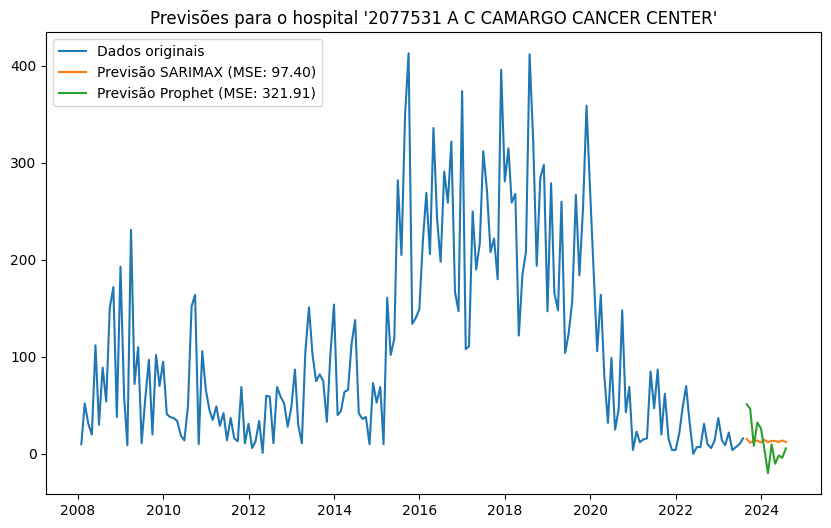

Previsão para o hospital '2077655 ASSOC AACD V CLEMENTINO':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1294.072, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1394.573, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1346.044, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1287.926, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1392.573, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1286.250, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1287.839, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1288.793, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1288.218, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1288.219, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1344.661, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1290.207, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1285.019, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1286.598, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1286.689, Time=0.11

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/4nhhl955.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/w86_mij3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71886', 'data', 'file=/tmp/tmpkkumvgxa/4nhhl955.json', 'init=/tmp/tmpkkumvgxa/w86_mij3.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelz5dz1b2w/prophet_model-20240409001825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1288.999, Time=0.28 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 4.271 seconds
MSE do modelo SARIMAX: 110.17498872016154
MSE do modelo Prophet: 100.67981842767561
O modelo Prophet é o melhor para este hospital.


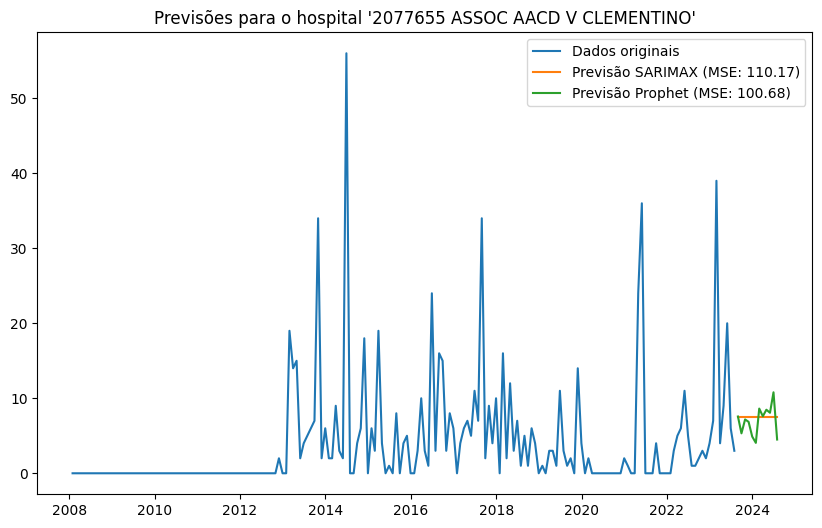

Previsão para o hospital '2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1975.071, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2067.319, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2003.699, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1989.266, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2065.462, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1973.190, Time=0.92 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1972.082, Time=0.37 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1973.237, Time=1.32 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1984.610, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1970.110, Time=0.52 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1971.268, Time=1.51 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=1971.219, Time=0.79 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=1973.095, Time=0.82 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1987.349, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1981.828, Time=0.11

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 ARIMA(3,1,2)(0,0,0)[12]             : AIC=inf, Time=0.26 sec

Best model:  ARIMA(2,1,1)(0,0,0)[12]          
Total fit time: 12.106 seconds


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/0fhvnll8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/1gjurkuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33728', 'data', 'file=/tmp/tmpkkumvgxa/0fhvnll8.json', 'init=/tmp/tmpkkumvgxa/1gjurkuy.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelxebthvan/prophet_model-20240409001838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 78663.10181648353
MSE do modelo Prophet: 22018.377500295537
O modelo Prophet é o melhor para este hospital.


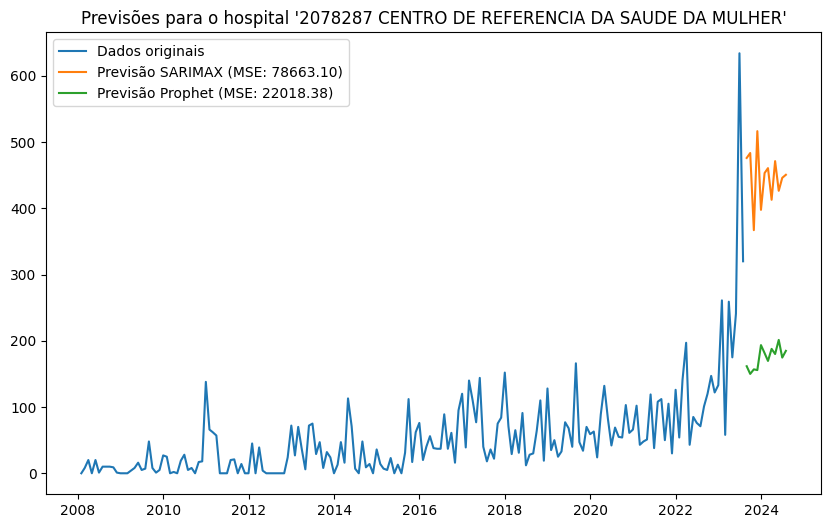

Previsão para o hospital '2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1187.977, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1299.137, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1240.262, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1185.155, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1297.137, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1184.031, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1185.215, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1187.051, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1185.085, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1185.114, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1238.413, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1187.085, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1182.031, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1183.215, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=1183.155, Time=0.13

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/u2ichzg8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/imy48v7m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30714', 'data', 'file=/tmp/tmpkkumvgxa/u2ichzg8.json', 'init=/tmp/tmpkkumvgxa/imy48v7m.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_model6h0c6kxv/prophet_model-20240409001841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=1185.085, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 3.096 seconds
MSE do modelo SARIMAX: 0.010722815273378372
MSE do modelo Prophet: 11.587164559564
O modelo SARIMAX é o melhor para este hospital.


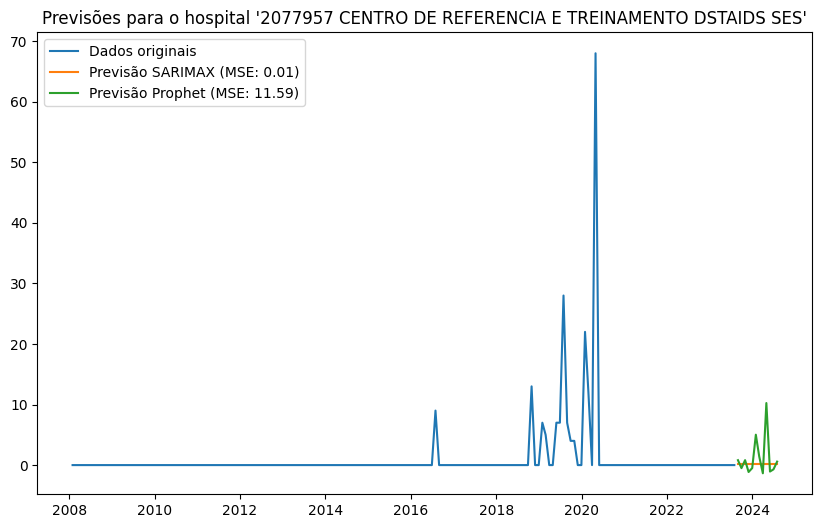

Previsão para o hospital '3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2282.243, Time=2.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2338.953, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2295.483, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2275.131, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2336.959, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2273.364, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2275.125, Time=0.35 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2275.356, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2275.358, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2294.047, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2277.359, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2271.526, Time=0.06 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2273.278, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2273.284, Time=0.15 sec


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/8myqa3k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/c3xtybzl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79222', 'data', 'file=/tmp/tmpkkumvgxa/8myqa3k0.json', 'init=/tmp/tmpkkumvgxa/c3xtybzl.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelhse9m57c/prophet_model-20240409001849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:18:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 5116.092509665301
MSE do modelo Prophet: 9637.568752555313
O modelo SARIMAX é o melhor para este hospital.


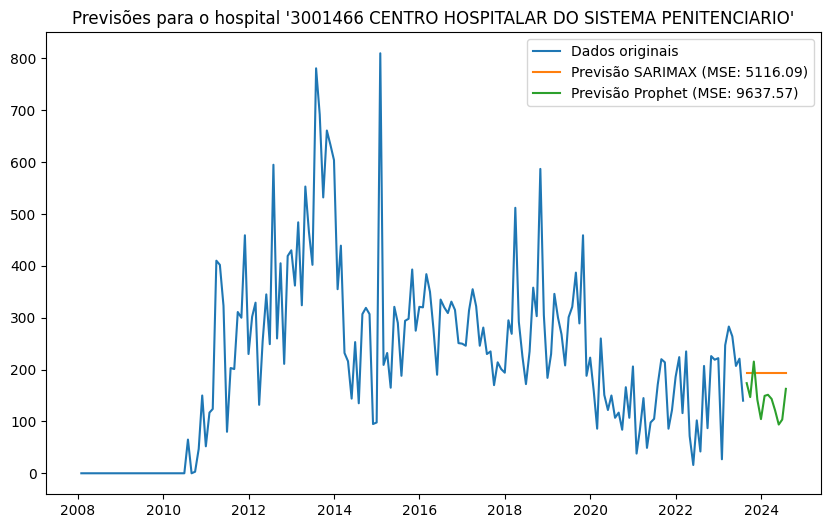

Previsão para o hospital '2080575 HOSP BENEF PORTUGUESA':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2447.341, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2540.235, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2480.377, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2443.008, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2538.236, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2443.538, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2446.190, Time=0.70 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2443.031, Time=0.75 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2443.569, Time=0.40 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=4.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2533.827, Time=0.40 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2444.190, Time=1.19 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2444.158, Time=0.40 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2479.523, Time=0.25 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2445.306, Time=0.84 sec


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/_vku2uks.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/eda7k2dq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22810', 'data', 'file=/tmp/tmpkkumvgxa/_vku2uks.json', 'init=/tmp/tmpkkumvgxa/eda7k2dq.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelh_kq_kai/prophet_model-20240409001904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 1299.7649261442457
MSE do modelo Prophet: 20784.209004136108
O modelo SARIMAX é o melhor para este hospital.


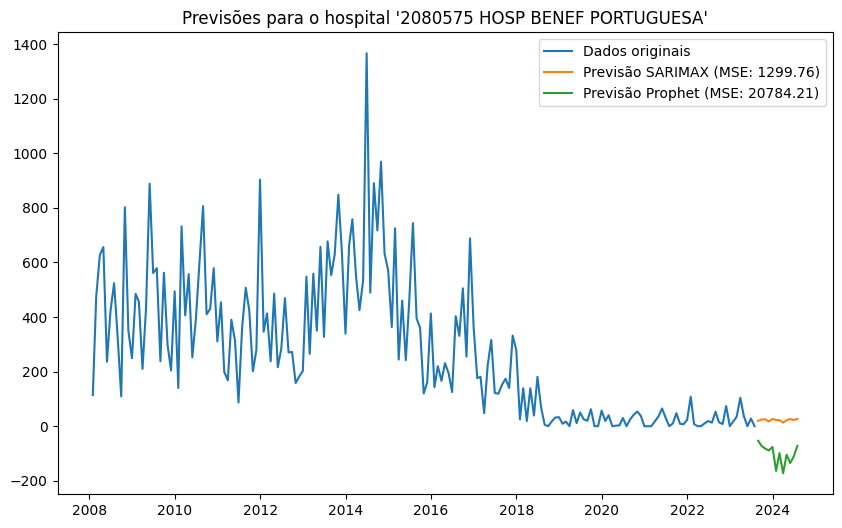

Previsão para o hospital '2078015 HOSP CLINICAS - HC DA FMUSP':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2892.980, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2872.996, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2867.425, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2890.992, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2868.874, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2867.069, Time=0.86 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2866.762, Time=0.47 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2867.646, Time=1.95 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2893.931, Time=0.08 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2860.860, Time=0.70 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2862.597, Time=0.34 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=2861.897, Time=1.88 sec
 ARIMA(0,1

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/0tsmo5kr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/68lf_349.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87831', 'data', 'file=/tmp/tmpkkumvgxa/0tsmo5kr.json', 'init=/tmp/tmpkkumvgxa/68lf_349.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelc4udjeq7/prophet_model-20240409001926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 15336.709156290439
MSE do modelo Prophet: 147751.8522058465
O modelo SARIMAX é o melhor para este hospital.


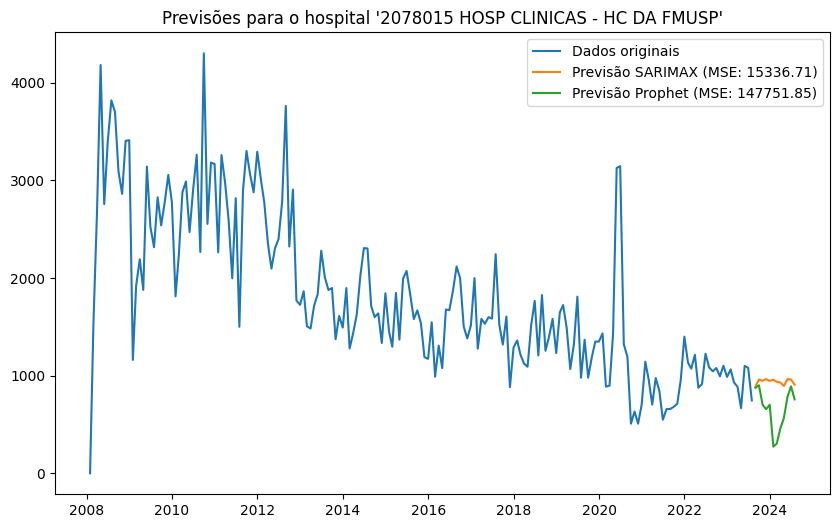

Previsão para o hospital '2075962 HOSP DA STA CASA DE STO AMARO':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2241.340, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2330.277, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2254.197, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2256.357, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2328.277, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2241.401, Time=3.53 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2241.228, Time=4.48 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.29 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=2238.196, Time=2.58 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=2247.887, Time=2.51 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2238.507, Time=0.85 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(1,1,2)(0,0,1)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/u98q9swo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/3lgc84s9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47731', 'data', 'file=/tmp/tmpkkumvgxa/u98q9swo.json', 'init=/tmp/tmpkkumvgxa/3lgc84s9.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modell9bruzua/prophet_model-20240409002045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 3591.219874820423
MSE do modelo Prophet: 16800.64520598561
O modelo SARIMAX é o melhor para este hospital.


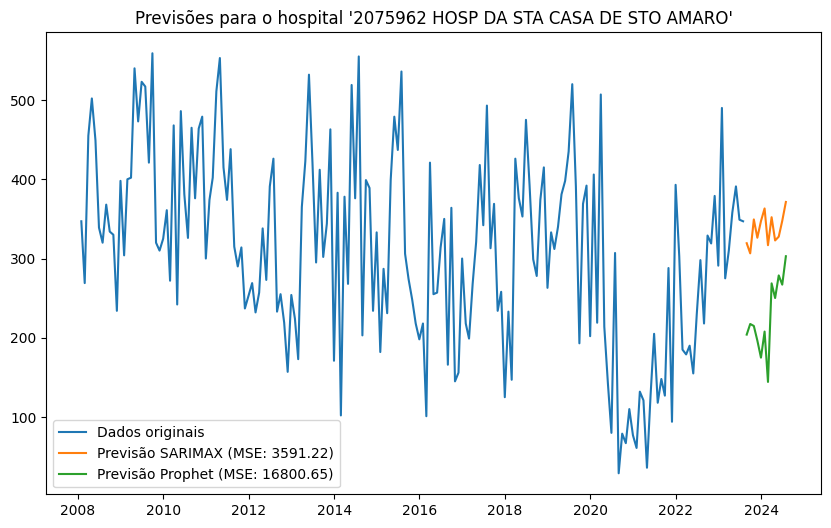

Previsão para o hospital '2077469 HOSP DOM ALVARENGA':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2064.492, Time=1.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2192.557, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2091.932, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2066.696, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2190.557, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2062.877, Time=0.74 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2066.251, Time=0.33 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2064.012, Time=2.07 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2062.499, Time=1.00 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2064.484, Time=3.06 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=4.02 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2062.435, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2066.827, Time=0.27 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2064.386, Time=2.00 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2064.409, Time=0.81 sec


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/z0lrv3yp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/si8ik1mk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49546', 'data', 'file=/tmp/tmpkkumvgxa/z0lrv3yp.json', 'init=/tmp/tmpkkumvgxa/si8ik1mk.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modele0uo8qw1/prophet_model-20240409002140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:21:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:21:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 1.3294263962228556e-13
MSE do modelo Prophet: 1456.9404171176557
O modelo SARIMAX é o melhor para este hospital.


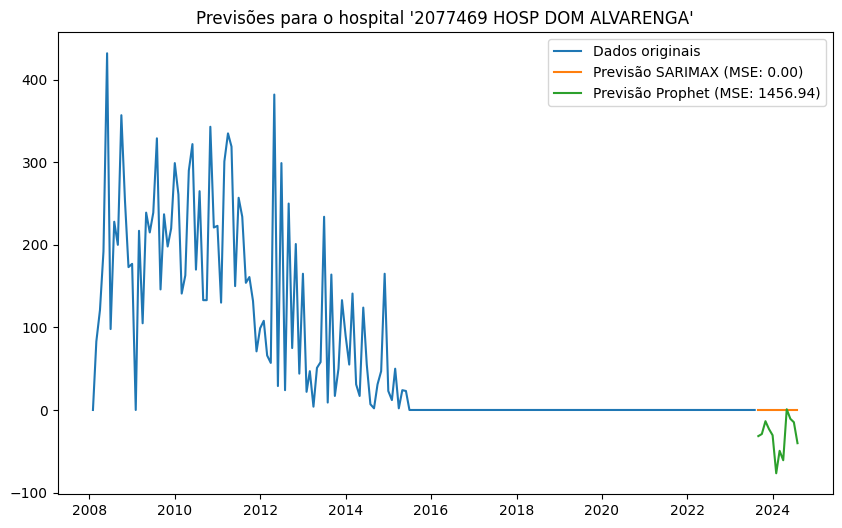

Previsão para o hospital '2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2307.765, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2304.859, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2301.904, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2305.768, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2300.459, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2301.821, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2303.385, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2285.934, Time=0.18 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2287.447, Time=0.47 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=2287.503, Time=0.43 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=2289.247, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2275.440, Time=0.39 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(1,1

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 ARIMA(1,1,4)(0,0,0)[12]             : AIC=2276.069, Time=0.42 sec

Best model:  ARIMA(0,1,3)(0,0,0)[12]          
Total fit time: 22.246 seconds


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/3w5s7zi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/c3gwql65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15856', 'data', 'file=/tmp/tmpkkumvgxa/3w5s7zi6.json', 'init=/tmp/tmpkkumvgxa/c3gwql65.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_models9wdv9q9/prophet_model-20240409002203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 1505.4043394162397
MSE do modelo Prophet: 2741.373101727649
O modelo SARIMAX é o melhor para este hospital.


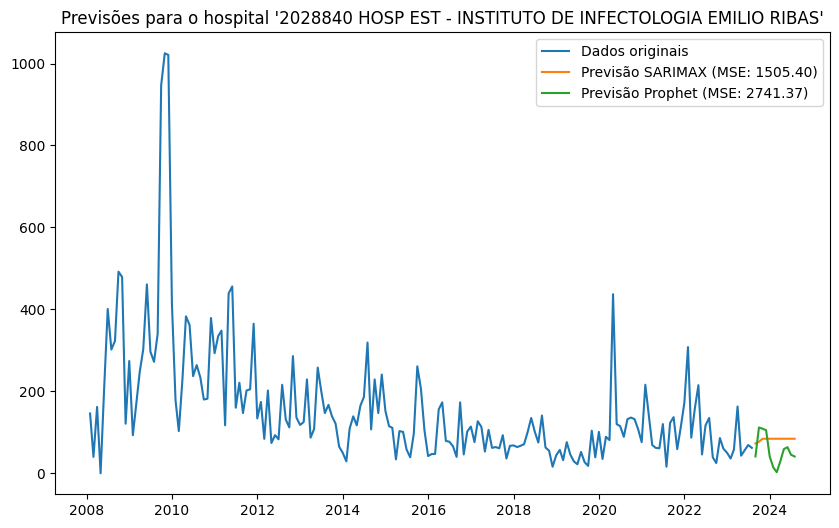

Previsão para o hospital '2088495 HOSP EST DANTE PAZZANESE- FUND ADIB JATENE':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2194.619, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2317.693, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2228.713, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2197.002, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2315.693, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2193.675, Time=0.99 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2191.676, Time=0.42 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2193.675, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2191.827, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2190.155, Time=0.42 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2192.132, Time=1.10 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=2192.133, Time=0.95 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=2193.252, Time=3.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2193.972, Time=0.69 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2219.814, Time=0.48

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 ARIMA(3,1,2)(0,0,0)[12]             : AIC=2192.853, Time=0.32 sec

Best model:  ARIMA(2,1,1)(0,0,0)[12]          
Total fit time: 16.660 seconds


DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/xaioxytx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/4oy3jlhd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10105', 'data', 'file=/tmp/tmpkkumvgxa/xaioxytx.json', 'init=/tmp/tmpkkumvgxa/4oy3jlhd.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelx4endavd/prophet_model-20240409002221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:22:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 6297.132798800118
MSE do modelo Prophet: 8778.940115028749
O modelo SARIMAX é o melhor para este hospital.


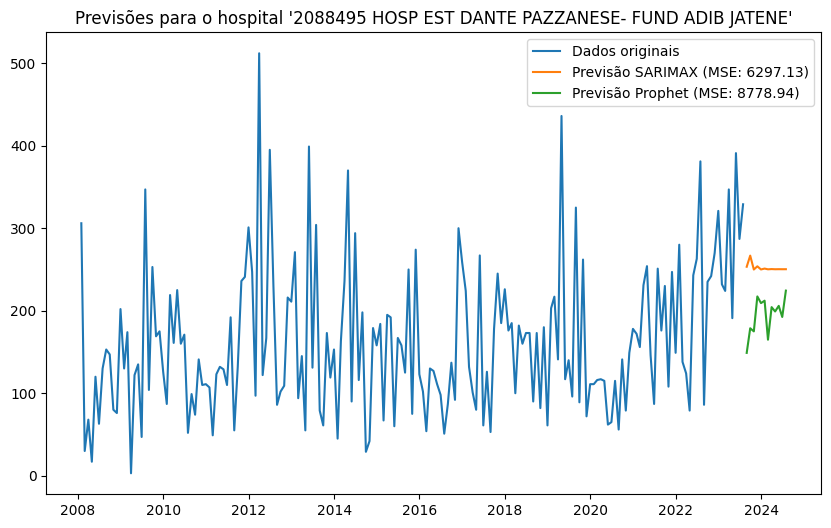

Previsão para o hospital '2077671 HOSP EST GRAJAU':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2924.225, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2887.722, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2922.236, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2886.623, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2887.745, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2886.738, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2877.326, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=2876.235, Time=0.20 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=2877.232, Time=0.41 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=2871.400, Time=1.52 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=2876.682, Time=0.29 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=2873.376, Time=4.88 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=2873.600, Time=2.25 sec
 ARIM

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/uimseb53.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/44ou63w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94946', 'data', 'file=/tmp/tmpkkumvgxa/uimseb53.json', 'init=/tmp/tmpkkumvgxa/44ou63w9.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelrpj2v6wt/prophet_model-20240409002443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:24:43 - cmd

MSE do modelo SARIMAX: 18827.06957270961
MSE do modelo Prophet: 72777.87753212829
O modelo SARIMAX é o melhor para este hospital.


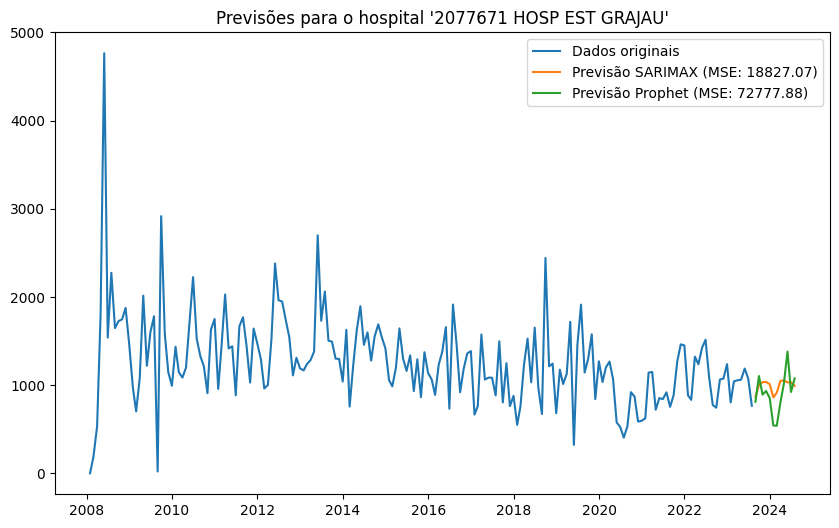

Previsão para o hospital '2079240 HOSP EST GUAIANASES - JESUS TEIXEIRA DA COSTA':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2575.427, Time=1.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2616.156, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2590.801, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2582.438, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2614.162, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2581.772, Time=1.13 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2580.129, Time=1.24 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2576.538, Time=3.00 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2576.491, Time=4.31 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2585.094, Time=0.37 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2579.988, Time=2.03 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2576.853, Time=2.80 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=2578.704, Time=3.47 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=2573.253, Time=1.50 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2581.320, Time=2.00

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/mjfzy3yv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/ltesxxf3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83288', 'data', 'file=/tmp/tmpkkumvgxa/mjfzy3yv.json', 'init=/tmp/tmpkkumvgxa/ltesxxf3.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelzzbqswky/prophet_model-20240409002734.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 3302.2494667451015
MSE do modelo Prophet: 25146.69392958931
O modelo SARIMAX é o melhor para este hospital.


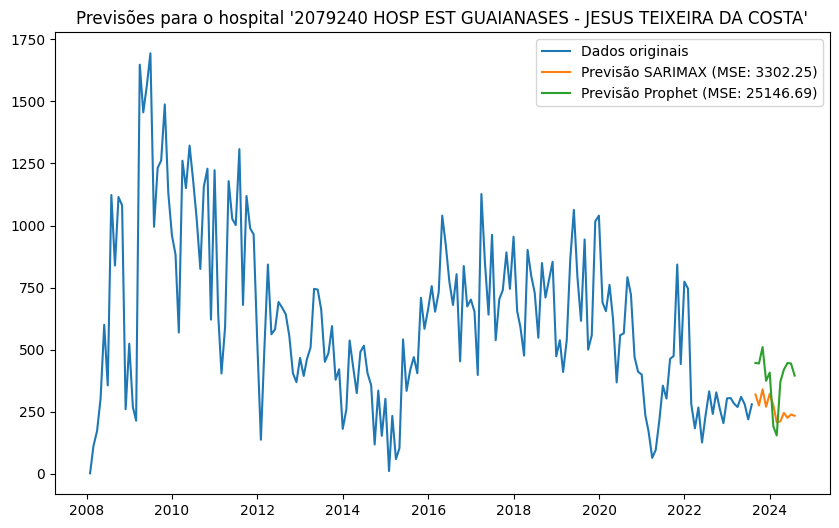

Previsão para o hospital '2066572 HOSP EST HELIOPOLIS':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2452.260, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2537.523, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2467.381, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2447.212, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2535.524, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2454.330, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2446.947, Time=0.59 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2445.993, Time=0.37 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2447.402, Time=1.02 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2448.777, Time=1.65 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2526.908, Time=0.20 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2447.572, Time=0.49 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=2447.687, Time=0.57 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2448.994, Time=1.60 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2443.993, Time=0.38

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/iy0a9k8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/b7d06c7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72642', 'data', 'file=/tmp/tmpkkumvgxa/iy0a9k8f.json', 'init=/tmp/tmpkkumvgxa/b7d06c7y.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modeljt2w6m0f/prophet_model-20240409002749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:27:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 17831.226021927694
MSE do modelo Prophet: 46647.68239953002
O modelo SARIMAX é o melhor para este hospital.


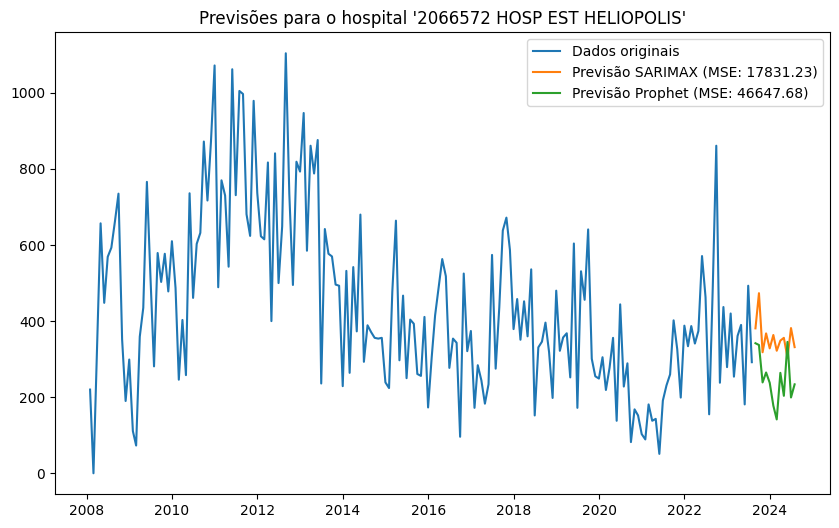

Previsão para o hospital '2088517 HOSP EST INF CANDIDO FONTOURA':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2785.869, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2723.427, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2696.886, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2783.882, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2716.958, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2688.253, Time=0.78 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2689.479, Time=0.41 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2687.238, Time=3.52 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2692.466, Time=1.42 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2689.629, Time=2.94 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2770.007, Time=1.21 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=2689.540, Time=2.80 sec
 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=2690.251, Time=4.43 sec
 ARIM

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/obd3via3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/z79ywi69.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19469', 'data', 'file=/tmp/tmpkkumvgxa/obd3via3.json', 'init=/tmp/tmpkkumvgxa/z79ywi69.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelhkhzv6gd/prophet_model-20240409002835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 20111.504045978665
MSE do modelo Prophet: 54424.05308600666
O modelo SARIMAX é o melhor para este hospital.


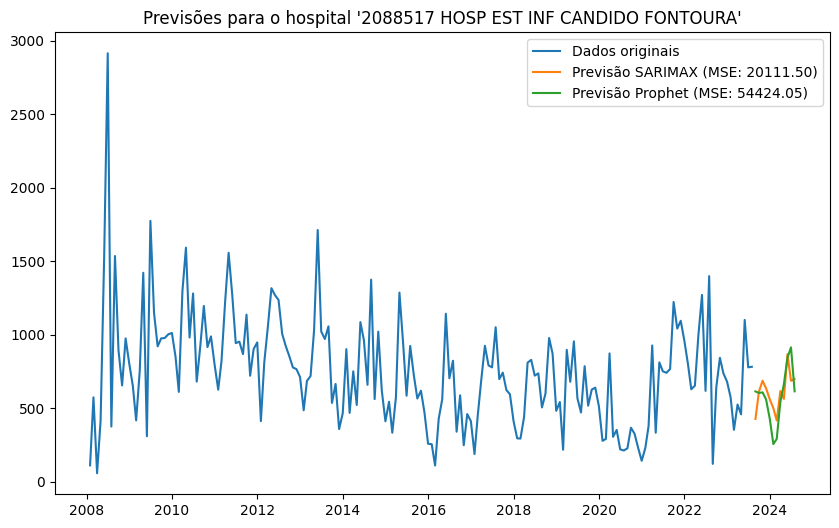

Previsão para o hospital '2071371 HOSP EST INF DARCY VARGAS':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2397.520, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2378.892, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2371.724, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2395.614, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2381.173, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2370.587, Time=0.72 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2370.036, Time=0.38 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=2371.654, Time=0.87 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2369.907, Time=2.09 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2369.634, Time=2.19 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2372.843, Time=1.19 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.45 sec
 ARIMA(0,1,2)(1

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/d704p3v0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/q0yfoa3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67681', 'data', 'file=/tmp/tmpkkumvgxa/d704p3v0.json', 'init=/tmp/tmpkkumvgxa/q0yfoa3w.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelkk11nvis/prophet_model-20240409002937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:37 - cmd

MSE do modelo SARIMAX: 13637.752846301564
MSE do modelo Prophet: 46438.48826104216
O modelo SARIMAX é o melhor para este hospital.


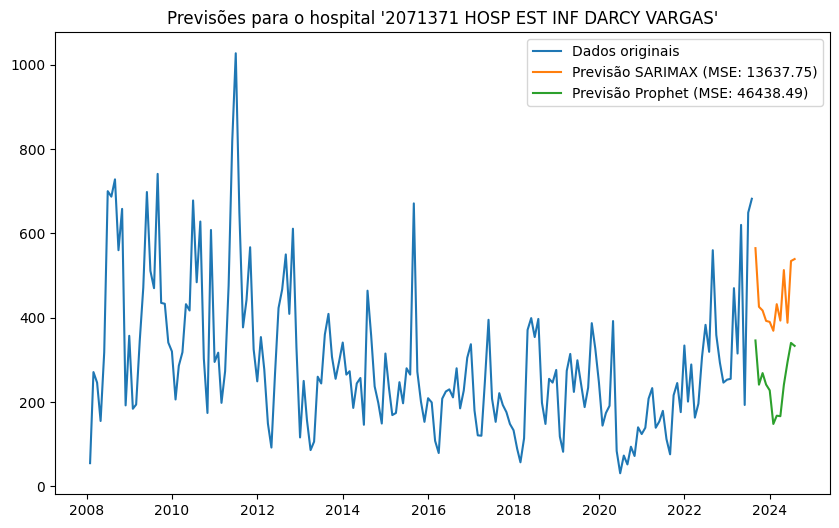

Previsão para o hospital '2077523 HOSP EST IPIRANGA':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2502.228, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2459.032, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2413.157, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2500.236, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2411.558, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2413.118, Time=0.37 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2414.275, Time=1.38 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2412.996, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2413.065, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2457.130, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2413.399, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2409.949, Time=0.07 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=2411.483, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=2411.528, Time=0.19 sec


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/vjazg7bg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/qrul5cow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57327', 'data', 'file=/tmp/tmpkkumvgxa/vjazg7bg.json', 'init=/tmp/tmpkkumvgxa/qrul5cow.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modelszlq6wsa/prophet_model-20240409002945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=2411.772, Time=0.26 sec

Best model:  ARIMA(0,1,1)(0,0,0)[12]          
Total fit time: 7.081 seconds


00:29:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 13747.693510354387
MSE do modelo Prophet: 25278.773822856765
O modelo SARIMAX é o melhor para este hospital.


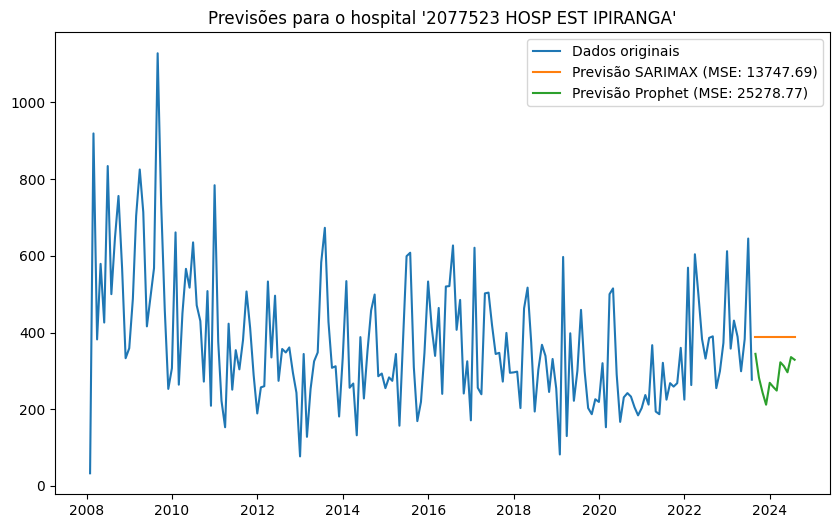

Previsão para o hospital '2077620 HOSP EST ITAIM PAULISTA (SANTA MARCELINA)':
Hospital '2077620 HOSP EST ITAIM PAULISTA (SANTA MARCELINA)' não encontrado.
Previsão para o hospital '5437156 HOSP EST LOCAL DE SAPOPEMBA':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data_hospital = data[data['Hospital'].str.contains(hospital_name, na=False, case=False)]
<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2221.175, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2271.652, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2244.868, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2216.388, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2269.703, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2215.297, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2216.405, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2218.037, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2214.640, Time=0.20 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2215.662, Time=0.45 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2215.642, Time=0.54 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2217.173, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2243.897, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2216.570, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2216.565, Time=0.34

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/l2vx0rpf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/d4k0lcrf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59291', 'data', 'file=/tmp/tmpkkumvgxa/l2vx0rpf.json', 'init=/tmp/tmpkkumvgxa/d4k0lcrf.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_model0jsitidu/prophet_model-20240409002957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


 ARIMA(1,1,3)(0,0,0)[12]             : AIC=2217.046, Time=0.32 sec

Best model:  ARIMA(0,1,2)(0,0,0)[12]          
Total fit time: 11.124 seconds


00:29:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 13496.618985115349
MSE do modelo Prophet: 11146.892429073921
O modelo Prophet é o melhor para este hospital.


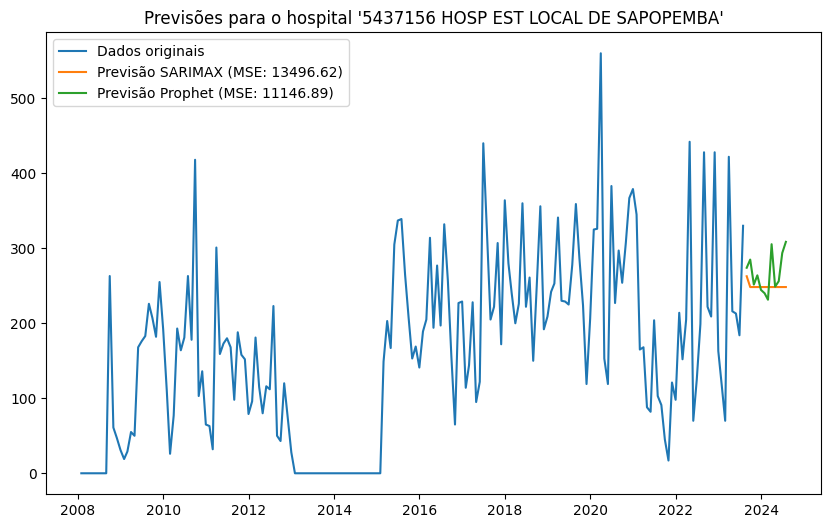

Previsão para o hospital '2077574 HOSP EST MANDAQUI':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2829.264, Time=1.31 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2859.496, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2829.425, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2835.515, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3227.769, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=2829.446, Time=0.27 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=2828.111, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=2831.291, Time=0.16 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=2824.908, Time=2.51 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=2826.447, Time=3.06 sec
 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=2827.216, Time=2.44 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=2825.606, Time=1.64 sec
 ARIMA(3,0,2)(2,0,0)[12] intercept   : AIC=2825.027, Time=3.08 sec
 ARIMA(2,0,3)(2,0,0)[12] intercept   : AIC=2825.710, Time=1.87 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=2826.077, Time=0.90

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/tu_35okg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/e0baeb4d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73504', 'data', 'file=/tmp/tmpkkumvgxa/tu_35okg.json', 'init=/tmp/tmpkkumvgxa/e0baeb4d.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_modeltlqsf74_/prophet_model-20240409003036.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:36 - cmd

MSE do modelo SARIMAX: 45886.03987544976
MSE do modelo Prophet: 115329.87086585602
O modelo SARIMAX é o melhor para este hospital.


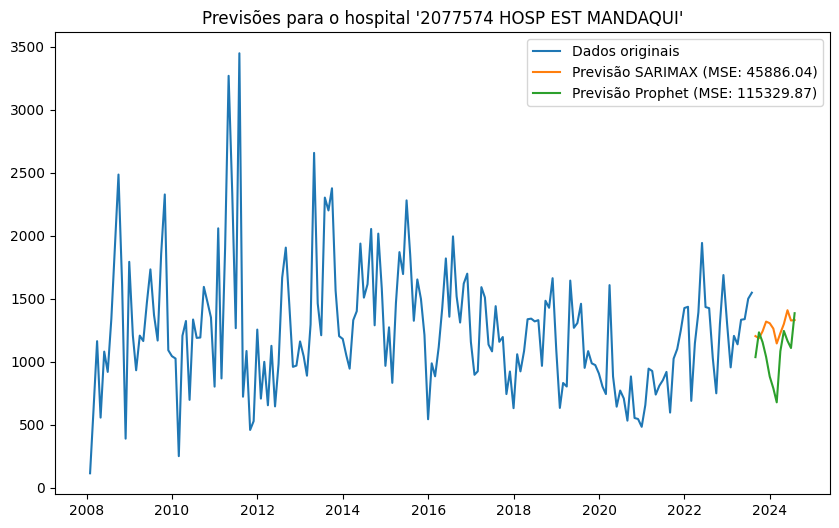

Previsão para o hospital '2065665 HOSP EST MAT INTERLAGOS':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1637.439, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1777.147, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1713.053, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1775.148, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1635.502, Time=0.54 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1633.779, Time=0.17 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1635.486, Time=0.60 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1638.165, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1637.540, Time=0.22 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=1634.725, Time=0.37 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1636.343, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=1636.466, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/18w3fkf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkkumvgxa/h2bo8qyg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63828', 'data', 'file=/tmp/tmpkkumvgxa/18w3fkf4.json', 'init=/tmp/tmpkkumvgxa/h2bo8qyg.json', 'output', 'file=/tmp/tmpkkumvgxa/prophet_model2dwbogml/prophet_model-20240409003054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:30:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:30:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MSE do modelo SARIMAX: 1670.0232426807527
MSE do modelo Prophet: 1468.3816235820034
O modelo Prophet é o melhor para este hospital.


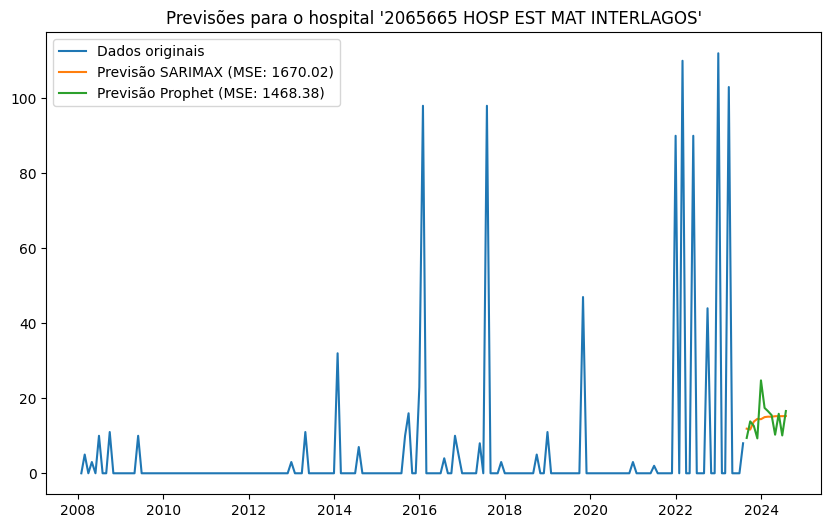

Previsão para o hospital '2077701 HOSP EST MAT LEONOR MENDES DE BARROS':
Performing stepwise search to minimize aic


<ipython-input-10-9ccb5d22746c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1620.244, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1764.517, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1701.415, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1629.881, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1762.518, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1619.699, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1619.516, Time=0.28 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1619.330, Time=0.49 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1619.908, Time=2.34 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1621.900, Time=2.81 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1624.900, Time=0.54 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=1621.009, Time=0.59 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=1617.183, Time=0.71 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=1617.062, Time=0.35 sec
 ARIMA(3,1,2)(0,0,1)[12] intercept   : AIC=1617.527, Time=0.71

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

# Função para preparar a visão de internações por mês/ano de um hospital específico
def prepare_time_series_for_hospital(data, hospital_name):
    # Filtrar o dataframe pelo hospital desejado
    data_hospital = data[data['Hospital'].str.contains(hospital_name, na=False, case=False)]

    # Se não encontrar o hospital, retorne None
    if data_hospital.empty:
        print(f"Hospital '{hospital_name}' não encontrado.")
        return None

    # Transformando o índice
    data_hospital.set_index(['Ano', 'Mês'], inplace=True)
    data_hospital.sort_index(inplace=True)

    # Selecionar a coluna de internações
    data_hospital = data_hospital['Internações']

    # Definir uma frequência mensal para o índice
    data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')

    return data_hospital

# Função de previsão usando SARIMAX com auto_arima
def forecast_time_series(data, steps=12):
    # Use auto_arima para encontrar os melhores hiperparâmetros do modelo SARIMA
    model = auto_arima(data, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore',
                      suppress_warnings=True, max_order=None)

    # Ajustar o modelo SARIMAX com os hiperparâmetros encontrados
    sarimax_model = SARIMAX(data, order=model.order, seasonal_order=model.seasonal_order)
    fitted_model = sarimax_model.fit(disp=False)

    # Fazer previsões
    forecast = fitted_model.get_forecast(steps=steps)
    forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Construir dataframe de previsão
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
        'Lower CI': forecast_conf_int.iloc[:, 0],
        'Upper CI': forecast_conf_int.iloc[:, 1]
    }, index=forecast_index)

    return forecast_df

# Função de previsão usando Prophet
def forecast_time_series_prophet(data):
    # Preparar o dataframe para o Prophet
    data_prophet = pd.DataFrame({
        'ds': data.index,
        'y': data.values
    })

    # Ajustar o modelo Prophet
    prophet_model = Prophet()
    prophet_model.fit(data_prophet)

    # Fazer previsões
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    forecast = prophet_model.predict(future)

    return forecast.set_index('ds')['yhat']

# Função para calcular o MSE
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Carregar o arquivo CSV
data = pd.read_csv(r'/content/serie_hist.csv')

# Obter os nomes únicos dos hospitais
hospital_names = data['Hospital'].unique()

# Criar um DataFrame vazio para armazenar as previsões
forecast_df = pd.DataFrame()

# Iterar sobre os nomes dos hospitais e fazer previsões para cada um
for hospital_name in hospital_names:
    print(f"Previsão para o hospital '{hospital_name}':")
    # Preparar a série temporal para o hospital específico
    hospital_time_series = prepare_time_series_for_hospital(data, hospital_name)

    # Se hospital_time_series não for None, faça a previsão
    if hospital_time_series is not None:
        # Previsão com SARIMAX
        hospital_forecast_sarimax = forecast_time_series(hospital_time_series)
        # Previsão com Prophet
        hospital_forecast_prophet = forecast_time_series_prophet(hospital_time_series)

        # Calcular o MSE para cada previsão
        mse_sarimax = calculate_mse(hospital_time_series[-12:], hospital_forecast_sarimax['Forecast'])
        mse_prophet = calculate_mse(hospital_time_series[-12:], hospital_forecast_prophet[-12:])

        # Imprimir os MSEs
        print(f"MSE do modelo SARIMAX: {mse_sarimax}")
        print(f"MSE do modelo Prophet: {mse_prophet}")

        # Comparar os MSEs e escolher o melhor modelo
        if mse_sarimax < mse_prophet:
            print("O modelo SARIMAX é o melhor para este hospital.")
            best_forecast = hospital_forecast_sarimax['Forecast']
        else:
            print("O modelo Prophet é o melhor para este hospital.")
            best_forecast = hospital_forecast_prophet[-12:]

        # Adicionar as previsões do melhor modelo ao DataFrame de previsões
        forecast_df[hospital_name] = best_forecast

        # Plotar as previsões
        plt.figure(figsize=(10, 6))
        plt.plot(hospital_time_series, label='Dados originais')
        plt.plot(hospital_forecast_sarimax['Forecast'], label=f'Previsão SARIMAX (MSE: {mse_sarimax:.2f})')
        plt.plot(hospital_forecast_prophet[-12:], label=f'Previsão Prophet (MSE: {mse_prophet:.2f})')
        plt.legend()
        plt.title(f"Previsões para o hospital '{hospital_name}'")
        plt.show()

# Imprimir o DataFrame de previsões
print(forecast_df)